<a href="https://colab.research.google.com/github/IsaelOliveira/Data-Sciente-Projects/blob/master/Projeto_5_Utilizando_algoritmo_de_Regress%C3%A3o_Log%C3%ADstica_para_classificar_pacientes_com_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by Isael Oliveira*


#Utilizando algoritmo de Regressão Logística para classificar pacientes com Doenças Cardiovasculares

A Regressão Logística serve para classificar algo dentro de um conjunto de categorias. 

## Regressão Logística no `scikit-learn`

O conjunto de dados original, que foi adapatado neste *notebook*, foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

[Neste link](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0) você encontra o arquivo com os dados já tratado. Para a variável alvo (*target*) você encontra as seguintes categorias:

* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1: há doença cardíaca ( > 50% de estreitamento do diâmetro)



A Regressão Logística é ideal nesse tipo de situação, de classificação, pois trabalha com probabilidades. No caso, após treinar o modelo consigo ver qual a probabilidade de um dado paciente possuir ou não algum problema no coração.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# importar scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Nesta etapa, irei dividir o dataset entre treino e teste.

In [ ]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector 
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2 Padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test)  # padronizar os dados de teste
y_pred = model.predict(X_test)

In [ ]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.83      0.71      0.77        35

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



Por fim, vou plotar a matriz de confusão para ter, pictorialmente, uma visão do desempenho por classes.

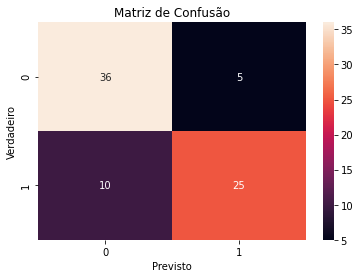

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Utilizando o método predict_proba para ver as probabilidades associadas a cada previsão.

In [ ]:
# probabilidades em cima do dataset de teste
y_prob = model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_proba: \n", y_prob[0:5])

y_pred: 
 [0 0 0 1 0]

y_proba: 
 [[0.97566382 0.02433618]
 [0.92798649 0.07201351]
 [0.92190455 0.07809545]
 [0.00920569 0.99079431]
 [0.72909775 0.27090225]]
